In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
# dataset = dataset_original.copy()
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.info()
print('Dataset shape: ', dataset.shape, sep="") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
Dataset shape: (400, 5)


In [4]:
# Finding if there are null values in the dataset
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# Finding how many missing data are there in the dataset
total = dataset.isnull().sum().sort_values(ascending=False)
percent = round(((dataset.isnull().sum() / dataset.isnull().count())*100),2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Missing values', '% of Total values'])
missing_data

,Missing values,% of Total values
Purchased,0,0.0
EstimatedSalary,0,0.0
Age,0,0.0
Gender,0,0.0
User ID,0,0.0


In [6]:
# Discard User ID, and take 'Gender', 'Age', 'EstimatedSalary' as independent variables.
# Take 'Purchased' as the dependent variable.
# X = dataset.iloc[:, [1, 2, 3]].values
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [8]:
# Applying feature scaling to the independent variables  
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
# Fitting Naive Bayes = Gaussian classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
print(classifier.predict(sc_X.transform([[35, 20000]])))

[0]


In [12]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  3]
 [ 4 18]]


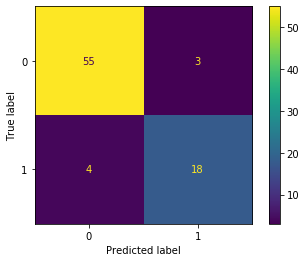

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)
# This means totally 73 is correct while there are 7 incorrect predictions.

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy of classifier = " + str(accuracy_score(y_test, y_pred)*100) + "%", sep="")

Accuracy of classifier = 91.25%


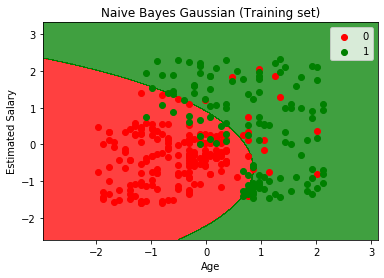

In [15]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['red', 'green'][i], label=j)
plt.title('Naive Bayes Gaussian (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

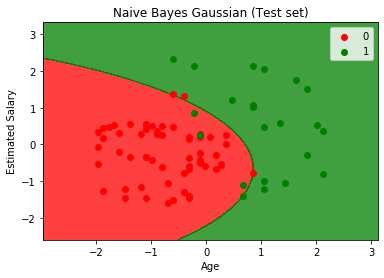

In [16]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['red', 'green'][i], label=j)
plt.title('Naive Bayes Gaussian (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()